In [3]:
import pandas as pd
import numpy as np
%matplotlib inline 

import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np

import os
import pandas as pd
from sklearn import metrics
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

pur_data = "Telco_Churn.csv"

# Read Purchasing File and store into Pandas data frame
telco_df = pd.read_csv(pur_data)

telco_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
total_records= telco_df['customerID'].nunique()

total_df = pd.DataFrame({"Total Customers":[total_records]})
print(total_df)

   Total Customers
0             7043


In [5]:
#drop customer ID no relevance to data
telco_df.drop(["customerID"], axis = 1, inplace = True)
telco_df


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
#looking for missing valuess
telco_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
telco_df['Churn'].describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

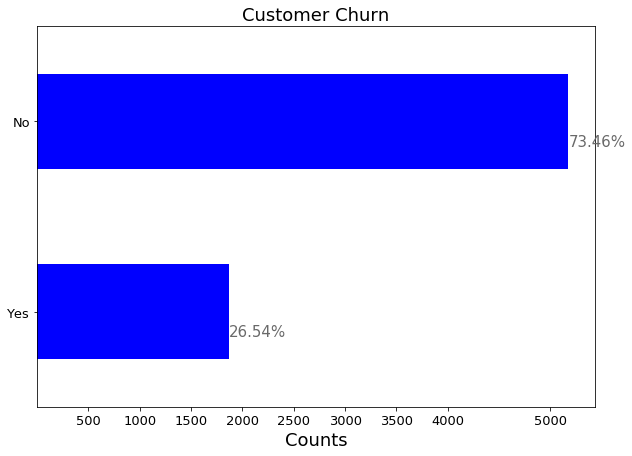

In [8]:
ax = telco_df['Churn'].value_counts().plot(kind='barh', figsize=(10,7),
                                        color="blue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Customer Churn", fontsize=18)
ax.set_xlabel("Counts", fontsize=18);
ax.set_xticks([500,1000 ,1500,2000,2500,3000,3500,4000,5000])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()


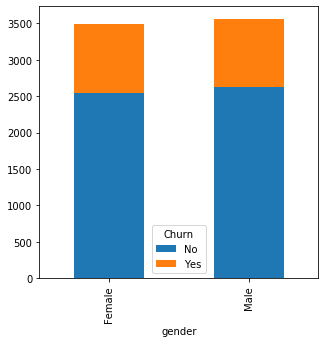

In [9]:
telco_df.groupby(["gender", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 


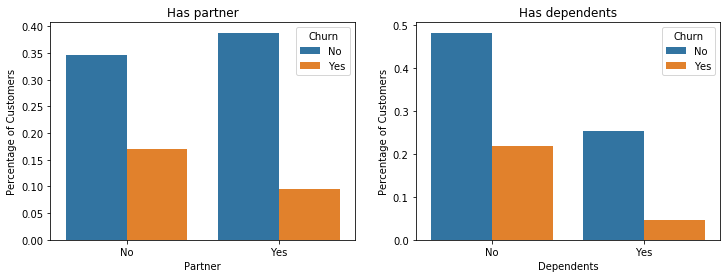

In [10]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "Percentage of Customers"
# Plot Partner column

gp_partner = telco_df.groupby('Partner')["Churn"].value_counts()/len(telco_df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = telco_df.groupby('Dependents')["Churn"].value_counts()/len(telco_df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

In [11]:
pmt=telco_df.groupby(['PaymentMethod'])["Churn"].count()
pmt


PaymentMethod
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Electronic check             2365
Mailed check                 1612
Name: Churn, dtype: int64

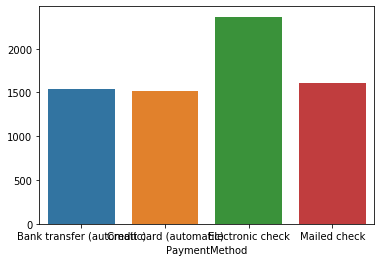

In [12]:
sns.barplot(pmt.index, pmt.values)


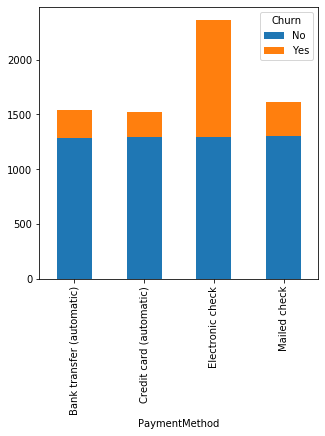

In [13]:
telco_df.groupby(["PaymentMethod", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 


In [14]:
devprot=telco_df.groupby(['DeviceProtection'])["Churn"].count()
devprot

DeviceProtection
No                     3095
No internet service    1526
Yes                    2422
Name: Churn, dtype: int64

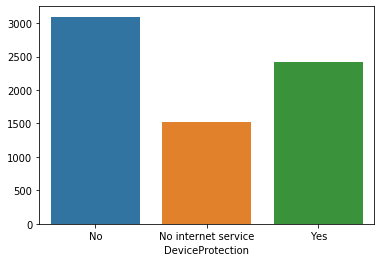

In [15]:
sns.barplot(devprot.index, devprot.values)

In [16]:
contract=telco_df.groupby(['Contract'])["Churn"].count()
contract

Contract
Month-to-month    3875
One year          1473
Two year          1695
Name: Churn, dtype: int64

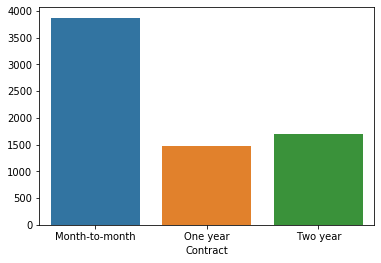

In [17]:
sns.barplot(contract.index, contract.values)

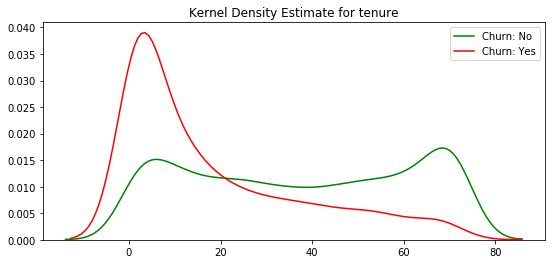

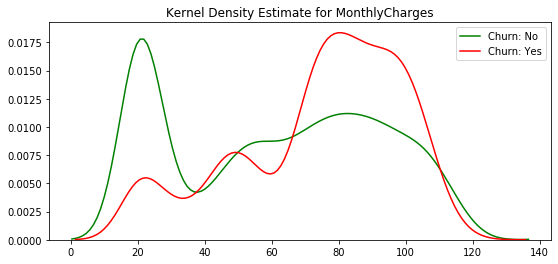

In [18]:
#Numerical cats

def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("Kernel Density Estimate for {}".format(feature))
    ax0 = sns.kdeplot(telco_df[telco_df['Churn'] == 'No'][feature].dropna(), color= 'green', label= 'Churn: No')
    ax1 = sns.kdeplot(telco_df[telco_df['Churn'] == 'Yes'][feature].dropna(), color= 'red', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')


In [19]:
lines=telco_df.groupby(['MultipleLines'])["Churn"].count()
lines

MultipleLines
No                  3390
No phone service     682
Yes                 2971
Name: Churn, dtype: int64

In [20]:
sns.barplot(lines.index, lines.values

SyntaxError: unexpected EOF while parsing (<ipython-input-20-be529ea2f0f3>, line 1)

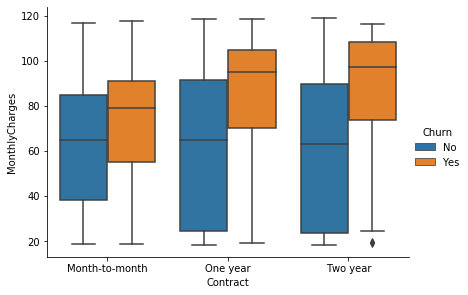

In [21]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=telco_df, height=4.2, aspect=1.4)

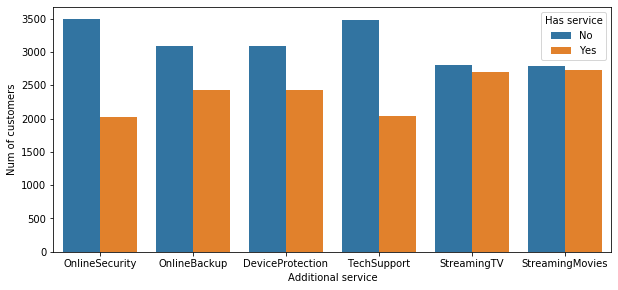

In [22]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(telco_df[telco_df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ct = sns.countplot(data=df1, x='variable', hue='Has service')
ct.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

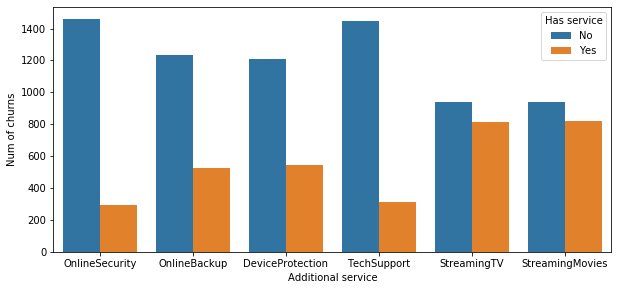

In [23]:
plt.figure(figsize=(10, 4.5))
df1 = telco_df[(telco_df.InternetService != "No") & (telco_df.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ct = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ct.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

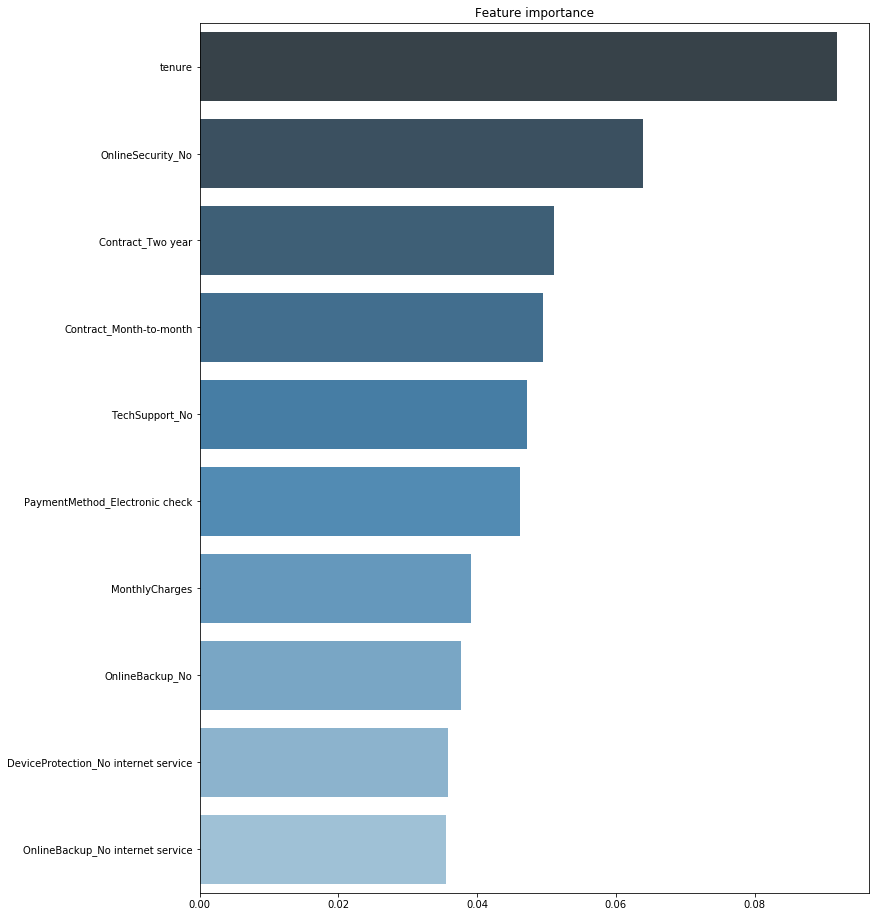

In [40]:
params = {'random_state': 0, 'n_jobs': -1, 'n_estimators': 100, 'max_depth': 8}
# One-hot encode
df = pd.get_dummies(telco_df)
# Drop redundant columns (for features with two unique values)
drop = ['Churn_Yes', 'Churn_No', 'gender_Female', 'Partner_No',
        'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No', 'InternetService_Fiber optic']
x, y = df.drop(drop,axis=1), df['Churn_Yes']
# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)[:10]
plt.figure(figsize=(12,16))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index[:10], x=imp.values[:10], palette="Blues_d", orient='h')

In [33]:
imp.values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [34]:
imp.index

Index(['TotalCharges_3778.85', 'TotalCharges_4872.45', 'TotalCharges_4872.2',
       'TotalCharges_4871.45', 'TotalCharges_4871.05', 'TotalCharges_487.95',
       'TotalCharges_487.05', 'TotalCharges_4869.5', 'TotalCharges_4869.35',
       'TotalCharges_4868.4'],
      dtype='object')

In [ ]:
Predicting customer churn